In [2]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt

## 1D Gradient Descent

1) Let us consider the function
$$ f(x) = (x-2)^2 + 1 $$
First plot it.

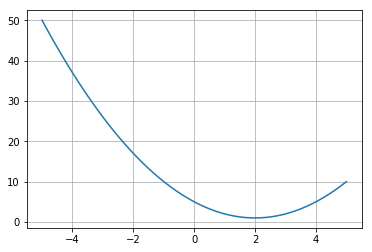

In [3]:
xs = np.linspace(-5,5,100)
f = lambda x: (x-2)**2 +1
ys = [f(x) for x in xs]
plt.plot(xs,ys)
plt.grid()

2) If we start at $x=4$, which way should we move and why?

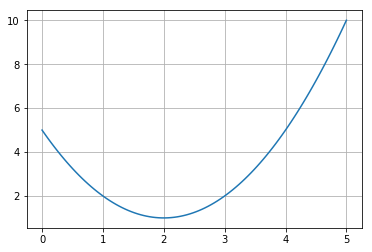

In [4]:
xs = np.linspace(0,5,100)
f = lambda x: (x-2)**2 +1
plt.plot(xs,[f(x) for x in xs])
plt.grid()
# should go to the left

3)If the step size is constants = 1.1, what does the update rule look like?

$$x_{n+1} = \ldots$$

In [5]:
def updateRule(f, start, n, stepsize): ## start = x0
    h = 1e-4
    x = start
    df= ((f((x+h))-f((x-h)))/(h+h))
    for i in range(n):
        plt.plot(x,f(x),"or")
        x = x - stepsize*df/np.abs(df)
        df= ((f(x+h)-f(x-h))/(h+h))
        
    return x

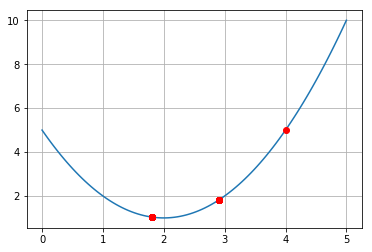

In [6]:
xs = np.linspace(0,5,100)
# xs = np.linspace(-5,5,100)
ys = [f(x) for x in xs]
plt.plot(xs,ys)
updateRule(f,4, 100, 1.1)
plt.grid()

4)Let try it with step size = 1.1. For 10 iteration. Print and plot your point as you go. Can you understand the behavior?

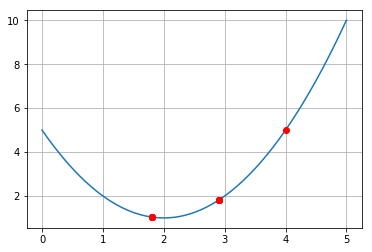

In [7]:
xs = np.linspace(0,5,100)
# xs = np.linspace(-5,5,100)
ys = [f(x) for x in xs]
plt.plot(xs,ys)
updateRule(f,4, 10, 1.1)
plt.grid()

5)Now let's try step size=0.01 for 100 iteration. Print and plot your point as you go. Can you understand the behavior?

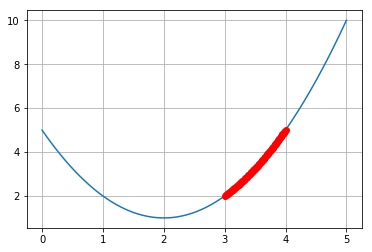

In [8]:
xs = np.linspace(0,5,100)
# xs = np.linspace(-5,5,100)
ys = [f(x) for x in xs]
plt.plot(xs,ys)
updateRule(f,4, 100, 0.01)
plt.grid()

In [9]:
#it will osciloate around the minimum and by the size that step in

6) When do we want the step size to be small and when do you want the step size to be big?

In [10]:
#stepsize = width/acuraccy 

7) What function kind of does that?

In [11]:
# stepsize = slope
#          = lmd*abs(df(x))

8)If we use that function, what does the update rule looks like.

In [12]:
def updateRule(f, start, n, lmd): ## start = x0
    h = 1e-4
    x = start
    df= ((f((x+h))-f((x-h)))/(h+h))
    for i in range(n):
        plt.plot(x,f(x),"or")
#         stepsize = lmd*np.abs(df)
#         x = x - stepsize*df/np.abs(df)
        x = x - lmd*df
        df= ((f(x+h)-f(x-h))/(h+h))
        
    return x

9) Try it with $\lambda=0.1$. Print and Plot to see what happens?

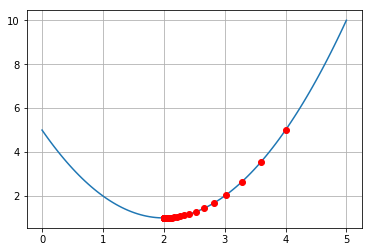

In [13]:
xs = np.linspace(0,5,100)
# xs = np.linspace(-5,5,100)
ys = [f(x) for x in xs]
plt.plot(xs,ys)
updateRule(f,4, 100, 0.1)
plt.grid()

10) Try it with $\lambda = 1.1$. For 4 iterations. Can you see how it goes?

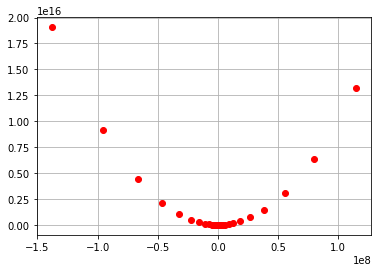

In [14]:
xs = np.linspace(-1.5,5,1000)
# xs = np.linspace(-5,5,100)
ys = [f(x) for x in xs]
plt.plot(xs,ys)
updateRule(f,4, 100, 1.1)
plt.grid()


In [15]:
#lmd should should be resonably small

### Multi-Dimension Gradient Descent

1) Let us consider the function.
$$f(x,y) = (x-2)^2 + xy + 2y + 1$$
Make the 3D plot.

Text(0.5,0.92,'f(x,y)')

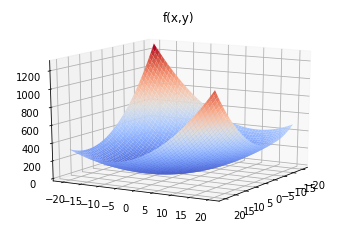

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface
def f(x,y):
    return (x-2)**2+x*y+y**2+1
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.gca().view_init(elev=15., azim=30)
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('f(x,y)')

2) Plot the contour.

Text(0.5,1,'f(x,y)')

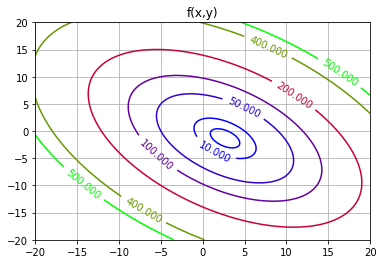

In [17]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
def f(x,y):
    return (x-2)**2+x*y+y**2+1

nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))

for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

3)Where do you think the minimum is?

In [18]:
#the middle of the circle

4)What is the gradient at (10,-15)? Use plt.arrow to plot arrow.

(0, 2)

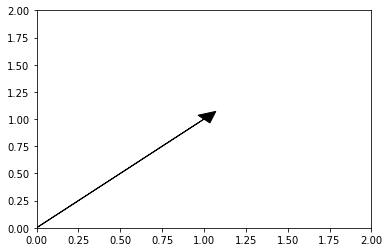

In [19]:
plt.arrow(0,0,1,1,head_width=0.1, head_length=0.1,fc='k',ec='k')
plt.xlim(0,2)
plt.ylim(0,2)

Text(0.5,1,'f(x,y)')

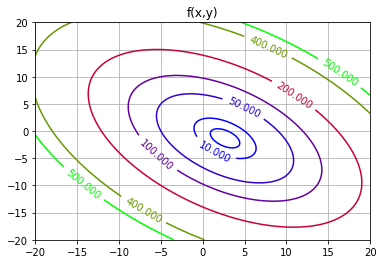

In [20]:
ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

5) If we want to minimize the function which way should we go? Find the unit vector in that direction.

6) What should your update rule look like? Use vector addition.

7) Use what we learn in 1D. How far should we go? What should the update rule really look like?

In [21]:
def gref(f,v):
    h = 1e-4
    x,y = v
    df_x= (f(x+h,y)-f(x-h,y))/(h+h)
    df_y= (f(x,y+h)-f(x,y-h))/(h+h)
    return np.array([df_x,df_y])
    

In [22]:
def updateRule_2D(f, x0, y0, n, lmd): ## start = x0
    v = [x0, y0]
    for i in range(n):
        plt.plot(v[0], v[1],"or") 
        v = v - lmd*gref(f,v)

    return v[0],v[1]

8) Use $\lambda = 0.1$ and see where the points go

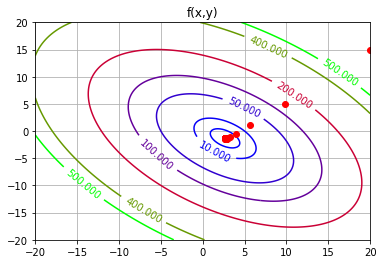

In [23]:
ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

x0 = 20
y0 = 15
n = 100
lmd = 0.2
ans = updateRule_2D(f, x0, y0, n, lmd)

### Linear Regression Revisited

Let us consider the problem of findind a line that pass through the points.

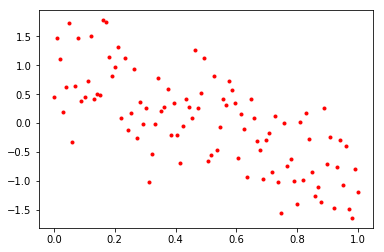

In [25]:
np.random.seed(123)
n = 100
xs = np.linspace(0,1,n)
ys = -2*xs + 1 + np.random.randn(n)/2
plt.plot(xs,ys,'.r')

In [26]:
def gref(f,v):
    h = 1e-4
    x,y = v
    df_x= (f(x+h,y)-f(x-h,y))/(h+h)
    df_y= (f(x,y+h)-f(x,y-h))/(h+h)
    return np.array([df_x,df_y])

def updateRule_2D(f, v, n, lmd): 
    for i in range(n):
        v = v - lmd*gref(f,v)

    return v[0],v[1]# tell me where the minimum is

1) What exactly are we trying to minimize and why?

In [27]:
#minimize the distance between dots and line which is depends on m and c

2) Minimize and Visualize it.

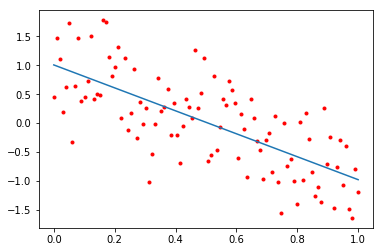

In [28]:
space = np.linspace(0,1,100)
def cost(m,c):
    return sum((m*xs + c - ys)**2)
m,c = updateRule_2D(cost,[0,1.5],1000,0.001)
plt.plot(xs,ys,'.r')
plt.plot(space, [m*s + c for s in space])

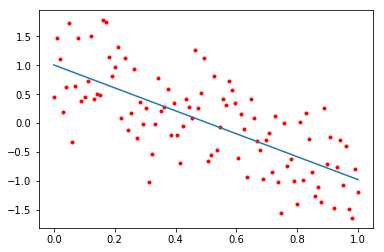

In [29]:
from scipy import optimize as opti
def cost(x):
    m,c = x
    return sum((m*xs + c - ys)**2)
wtf = opti.minimize(cost,[0,1.5])
m,c = wtf.x
plt.plot(xs,ys,'.r')
plt.plot(space, [m*s + c for s in space])

### Separating Line.

We want to draw a separating line betwen two datasets shown below.

In [30]:
np.random.seed(234)
n1 = 100
n2 = 100
mean = [0, 0]
cov = [[1, -0.5], [-0.5, 1]]
r1, r2 = np.random.multivariate_normal(mean, cov, n1).T
#plt.plot(r1, r2, '.r')

mean = [2, 2]
cov = [[1, 0], [0, 1]]
b1, b2 = np.random.multivariate_normal(mean, cov, n2).T
#plt.plot(b1, b2, '.b')

c = np.zeros(n1+n2)
c[:n1] = 1.
c[n1:] = 0.
#print c

d = np.zeros((n1+n2,2))
d[:n1,0] = r1
d[:n1,1] = r2
d[n1:,0] = b1
d[n1:,1] = b2

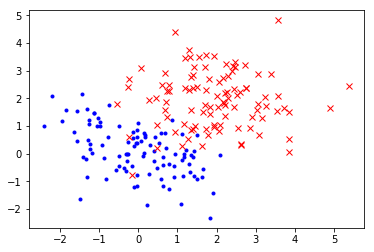

In [31]:
plt.plot(d[c==1,0], d[c==1,1],'.b')#note boolean indexing
plt.plot(d[c==0,0], d[c==0,1],'xr')#note boolean indexing

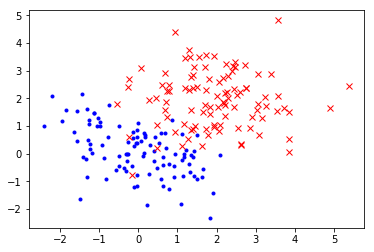

In [32]:
x_o = d[c==1,0]
y_o = d[c==1,1]

x_x = d[c==0,0]
y_x = d[c==0,1]

plt.plot(x_o,y_o,".b")
plt.plot(x_x,y_x,"xr")

1) How can we model this as a optimization problem?

[-0.6080147   1.27794945]


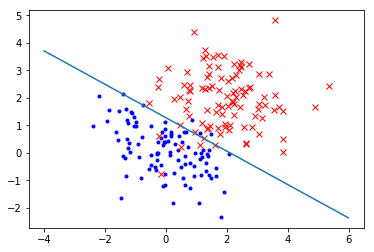

In [33]:
def cost(v):
    m,b = v
    score = 0
    for dd, cc in zip(d,c):
        x,y = dd
        if(cc == 1 and y > (m*x+b)):
            score+= (y - (m*x+b))
        elif(cc == 0 and y < (m*x+b)):
            score+= ((m*x+b)-y)
    return score

wtf = opti.minimize(cost,[1,1])
m,b = wtf.x
print(wtf.x)
plt.plot(x_o,y_o,".b")
plt.plot(x_x,y_x,"xr")
space = np.linspace(-4, 6, 100)
plt.plot(space, [m*s + b for s in space])

2) What equation do we plot?

3) Minimize and plot it to see that you get the right line.

In [34]:
#this is how you make a padded array
nr, nc = d.shape
pd = np.zeros((nr,nc+1))
pd[:,1:] = d
pd[:,0] =  1.0
print(pd[:20])

[[ 1.         -1.23086966  0.18731902]
 [ 1.          0.15690022  0.76467807]
 [ 1.         -1.48876741 -1.64011723]
 [ 1.          1.30714602 -0.37248023]
 [ 1.          0.67461839  0.75059711]
 [ 1.          0.94584269 -0.01901824]
 [ 1.          1.65971858 -0.56346172]
 [ 1.          1.91304992 -1.43409072]
 [ 1.         -1.25215912  1.07673845]
 [ 1.         -0.37260327 -0.51585145]
 [ 1.          0.71465901  0.19371616]
 [ 1.         -0.10270834 -1.22090529]
 [ 1.         -1.30358744  1.60276889]
 [ 1.          0.42723536  0.61684556]
 [ 1.         -0.2558605   0.00338542]
 [ 1.         -0.48066857  0.98644225]
 [ 1.         -0.2691181   0.41096303]
 [ 1.          1.3099536  -0.67015697]
 [ 1.          0.28005885 -0.74420921]
 [ 1.          1.34634767 -0.03558485]]
